# Capstone Project - Starting Restaurant Business in Toronto

#### This Notebook is used for create and implement the IBM capstone project. This is a course on Coursera.

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>

With the development of tourism in Canada, restaurant industry has become an attractive area for investors over the world. With the development of modern technologies, the requirment of diverse food services with high qualities is increasing.

In this project, the following questions, **“Where is the best location to open a restaurant in Toronto city?”** and **“Which type of restaurants should be opened in different neighbourhoods in Toronto city?”**, will be answered. 

The optimal location and optimal restaurant types in some neighbourhoods of Toronto are provided with a clarified explanation and analysis and the target audiences of this research are the stockholders who have interests in investing and starting restaurant business in Toronto. 

## Data <a name="data"></a>

The data required in this project is:

- geographic information of neighbourhoods in Toronto
- geographic information of famous venues in each neighbourhoods
- population distributions in each neighbourhood  
- average income level in each neighbourhood

Among the above data, the data used in our research is location of neighbourhood center, location of famous venues and the population distribution in each age group and different income levels.

Then the data resources used in this research is listed as follows:

-	Foursqaure API: existing restaurants' locations and types in each neighbourhood  
-	Toronto Open Data: population distribution and income level in each neighbourhood 
-	Google Maps API: centre of each neighbourhood



### Neighborhoods

The neighbourhood in Toronto should be determined, including the age distribution, income level, geographic information, local famous venues. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_nbhood_all = pd.read_csv('neighbourhood-profiles-2016-csv.csv')
print(df_nbhood_all.shape)
df_nbhood_all.head(10)

(2383, 146)


,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,...,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,...,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood
2,3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016","2,731,571","29,113","23,757","12,054","30,526",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
3,4,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2011","2,615,060","30,279","21,988","11,904","29,177",...,"15,004","21,343","53,350","11,703","7,826","13,986","10,578","11,652","27,713","14,687"
4,5,Population,Population and dwellings,Census Profile 98-316-X2016001,Population Change 2011-2016,4.50%,-3.90%,8.00%,1.30%,4.60%,...,12.90%,3.80%,0.30%,7.20%,0.50%,2.60%,11.70%,7.50%,-0.40%,0.80%
5,6,Population,Population and dwellings,Census Profile 98-316-X2016001,Total private dwellings,"1,179,057","9,371","8,535","4,732","18,109",...,"8,054","8,721","19,098","5,620","3,604","6,185","6,103","7,475","11,051","5,847"
6,7,Population,Population and dwellings,Census Profile 98-316-X2016001,Private dwellings occupied by usual residents,"1,112,929","9,120","8,136","4,616","15,934",...,"7,549","8,509","18,436","5,454","3,449","5,887","5,676","7,012","10,170","5,344"
7,8,Population,Population and dwellings,Census Profile 98-316-X2016001,Population density per square kilometre,"4,334","3,929","3,034","2,435","10,863",...,"5,820","4,007","4,345","7,838","6,722","8,541","7,162","10,708","2,086","2,451"
8,9,Population,Population and dwellings,Census Profile 98-316-X2016001,Land area in square kilometres,630.2,7.41,7.83,4.95,2.81,...,2.91,5.53,12.31,1.6,1.17,1.68,1.65,1.17,13.23,6.04
9,10,Population,Age characteristics,Census Profile 98-316-X2016001,Children (0-14 years),"398,135","3,840","3,075","1,760","2,360",...,"1,785","3,555","9,625","2,325","1,165","1,860","1,800","1,210","4,045","1,960"


According to the dataset, each column represents the population of the neighbourhood. 

In [3]:
# show the names of neighbourhood
print(list(df_nbhood_all.columns[6:])) 

['Agincourt North', 'Agincourt South-Malvern West', 'Alderwood', 'Annex', 'Banbury-Don Mills', 'Bathurst Manor', 'Bay Street Corridor', 'Bayview Village', 'Bayview Woods-Steeles', 'Bedford Park-Nortown', 'Beechborough-Greenbrook', 'Bendale', 'Birchcliffe-Cliffside', 'Black Creek', 'Blake-Jones', 'Briar Hill-Belgravia', 'Bridle Path-Sunnybrook-York Mills', 'Broadview North', 'Brookhaven-Amesbury', 'Cabbagetown-South St. James Town', 'Caledonia-Fairbank', 'Casa Loma', 'Centennial Scarborough', 'Church-Yonge Corridor', 'Clairlea-Birchmount', 'Clanton Park', 'Cliffcrest', 'Corso Italia-Davenport', 'Danforth', 'Danforth East York', 'Don Valley Village', 'Dorset Park', 'Dovercourt-Wallace Emerson-Junction', 'Downsview-Roding-CFB', 'Dufferin Grove', 'East End-Danforth', 'Edenbridge-Humber Valley', 'Eglinton East', 'Elms-Old Rexdale', 'Englemount-Lawrence', 'Eringate-Centennial-West Deane', 'Etobicoke West Mall', 'Flemingdon Park', 'Forest Hill North', 'Forest Hill South', 'Glenfield-Jane Heig

In [5]:
# number of categories in the dataframe
df_nbhood_all['Category'].value_counts()

Language                                   808
Income                                     311
Language of work                           280
Ethnic origin                              279
Education                                  182
Immigration and citizenship                154
Labour                                      76
Housing                                     74
Families, households and marital status     70
Population                                  55
Aboriginal peoples                          34
Journey to work                             25
Mobility                                    18
Visible minority                            15
Neighbourhood Information                    2
Name: Category, dtype: int64

According to the above list, we have various statistacal information in the same area. What we are interested in are age groups, income levels and immigration statuses. We then take a look at these seperate aspects. 

In [6]:
# list every content
print(list(df_nbhood_all['Characteristic']))

['Neighbourhood Number', 'TSNS2020 Designation', 'Population, 2016', 'Population, 2011', 'Population Change 2011-2016', 'Total private dwellings', 'Private dwellings occupied by usual residents', 'Population density per square kilometre', 'Land area in square kilometres', 'Children (0-14 years)', 'Youth (15-24 years)', 'Working Age (25-54 years)', 'Pre-retirement (55-64 years)', 'Seniors (65+ years)', 'Older Seniors (85+ years)', 'Male: 0 to 04 years', 'Male: 05 to 09 years', 'Male: 10 to 14 years', 'Male: 15 to 19 years', 'Male: 20 to 24 years', 'Male: 25 to 29 years', 'Male: 30 to 34 years', 'Male: 35 to 39 years', 'Male: 40 to 44 years', 'Male: 45 to 49 years', 'Male: 50 to 54 years', 'Male: 55 to 59 years', 'Male: 60 to 64 years', 'Male: 65 to 69 years', 'Male: 70 to 74 years', 'Male: 75 to 79 years', 'Female: 10 to 14 years', 'Male: 80 to 84 years', 'Male: 85 to 89 years', 'Male: 90 to 94 years', 'Male: 95 to 99 years', 'Male: 100 years and over', 'Female: 0 to 04 years', 'Female:

#### Age distribution
The first aspect we interested in is the age distribution in the population in each neighbourhood. A new dataframe containing the populations in each neighbourhood can be generated with the required information.  

In [399]:
# names of the neighbourhood
nbhood_names = list(df_nbhood_all.columns[7:])

# population that we are interested
array = ['Population, 2016','Children (0-14 years)','Youth (15-24 years)','Working Age (25-54 years)',
         'Pre-retirement (55-64 years)','Seniors (65+ years)','Older Seniors (85+ years)']
nbhood_pop = df_nbhood_all.loc[df_nbhood_all['Characteristic'].isin(array)].transpose()

# remove the non-related columns
nbhood_pop.drop(['_id','Category','Topic','Data Source'],axis=0,inplace=True)
nbhood_pop.columns = nbhood_pop.iloc[0]
nbhood_pop.drop(nbhood_pop.index[0], inplace=True)
nbhood_pop.reset_index(inplace=True)

# rename the columns
nbhood_pop_names = ['Neighbourhood','Population(2016)', 'Children(0-14)', 'Youth(15-24)', 'WorkingAge(25-54)',
                   'Pre-retirement(55-64)', 'Seniors(65+)','OlderSeniors(85+)']
nbhood_pop.columns = nbhood_pop_names
nbhood_pop

,Neighbourhood,Population(2016),Children(0-14),Youth(15-24),WorkingAge(25-54),Pre-retirement(55-64),Seniors(65+),OlderSeniors(85+)
0,City of Toronto,"2,731,571","398,135","340,270","1,229,555","336,670","426,945","66,000"
1,Agincourt North,"29,113","3,840","3,705","11,305","4,230","6,045",925
2,Agincourt South-Malvern West,"23,757","3,075","3,360","9,965","3,265","4,105",555
3,Alderwood,"12,054","1,760","1,235","5,220","1,825","2,015",320
4,Annex,"30,526","2,360","3,750","15,040","3,480","5,910","1,040"
...,...,...,...,...,...,...,...,...
136,Wychwood,"14,349","1,860","1,320","6,420","1,595","3,150",880
137,Yonge-Eglinton,"11,817","1,800","1,225","5,860","1,325","1,600",165
138,Yonge-St.Clair,"12,528","1,210",920,"5,960","1,540","2,905",470
139,York University Heights,"27,593","4,045","4,750","12,290","2,965","3,530",400


We need to clean the data and transfer the data type.

In [8]:
nbhood_pop.dropna()
for i in range(0,nbhood_pop.shape[0]):
    for j in range(1,nbhood_pop.shape[1]):
        nbhood_pop.iloc[i,j] = nbhood_pop.iloc[i,j].replace(',','')
        
nbhood_pop.iloc[:,1:] = nbhood_pop.iloc[:,1:].astype(float)
nbhood_pop_dens = nbhood_pop.drop('Population(2016)', axis=1)
for i in range(1, len(nbhood_pop_dens.columns)):
    nbhood_pop_dens.iloc[:,i] = nbhood_pop_dens.iloc[:,i] / nbhood_pop.iloc[:,1]

nbhood_pop_dens.columns = ['Neighbourhood', 'Children(0-14)(Density)', 'Youth(15-24)(Density)', 'WorkdingAge(25-54)(Density)',
                           'Pre-retirement(55-64)(Density)', 'Seniors(65+)(Density)','OlderSeniors(85+)(Density)']
nbhood_pop_dens.head()

,Neighbourhood,Children(0-14)(Density),Youth(15-24)(Density),WorkdingAge(25-54)(Density),Pre-retirement(55-64)(Density),Seniors(65+)(Density),OlderSeniors(85+)(Density)
0,City of Toronto,0.145753,0.124569,0.450127,0.123251,0.1563,0.0241619
1,Agincourt North,0.1319,0.127263,0.388314,0.145296,0.207639,0.0317727
2,Agincourt South-Malvern West,0.129436,0.141432,0.419455,0.137433,0.172791,0.0233615
3,Alderwood,0.14601,0.102456,0.433051,0.151402,0.167164,0.0265472
4,Annex,0.0773111,0.122846,0.492695,0.114001,0.193605,0.0340693


#### Income group
Then we need to know the income distribution in each neighbourhood, which reflects the purchasing power.

In [9]:
df_nbhood_income_all = df_nbhood_all[df_nbhood_all['Category']=='Income']
list(df_nbhood_income_all['Characteristic'])

['    $150,000 to $199,999',
 '    $60,000 to $69,999',
 '    $70,000 to $79,999',
 '    $80,000 to $89,999',
 '    $90,000 to $99,999',
 '      $150,000 and over',
 '      $100,000 and over',
 '    $100,000 and over',
 '      $100,000 to $149,999',
 'Total - Income statistics in 2015 for the population aged 15 years and over in private households',
 '  Number of total income recipients aged 15 years and over in private households',
 '    Median total income in 2015 among recipients ($)',
 '  Number of after-tax income recipients aged 15 years and over in private households - 100% data',
 '    Median after-tax income in 2015 among recipients ($)',
 '  Number of market income recipients aged 15 years and over in private households - 100% data',
 '    $30,000 to $39,999',
 '    Median market income in 2015 among recipients ($)',
 '  Number of government transfers recipients aged 15 years and over in private households - 100% data',
 '    Median government transfers in 2015 among recipien

The same method is used to generate a new dataframe with the income information in each neighbourhood. As there are so many income statistical information, the data used in this research is the after-tax group, which reflects the most real purchasing power. 

In [400]:
# locate the row 
req_idx = df_nbhood_all[df_nbhood_all['Characteristic']=='Total - After-tax income groups in 2015 for the population aged 15 years and over in private households - 100% data'].index
req_idx_end = df_nbhood_all[df_nbhood_all['Characteristic']=='Total - Employment income groups in 2015 for the population aged 15 years and over in private households - 100% data'].index
print('The row starts from {} and ends at{}'.format(req_idx[0],req_idx_end[0]))

# income information that we are interested
nbhood_income = df_nbhood_all.iloc[req_idx[0]:req_idx_end[0]].transpose()
nbhood_income.drop(['_id','Category','Topic','Data Source'],axis=0,inplace=True)
nbhood_income.columns = nbhood_income.iloc[0]
nbhood_income.drop(nbhood_income.index[0], inplace=True)

# remove the non-related columns
nbhood_income.drop(['  Without after-tax income', '  With after-tax income', '  Percentage with after-tax income', '    $80,000 and over'], axis=1, inplace=True)
nbhood_income.reset_index(inplace=True)

# rename the columns
nbhood_income_names = ['Neighbourhood','Total_Income($)', 'Under_10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k',
                       '50k-60k', '60k-70k', '70k-80k', '80k-90k', '90k-100k']
nbhood_income.columns = nbhood_income_names
nbhood_income

The row starts from 984 and ends at999


,Neighbourhood,Total_Income($),Under_10k,10k-20k,20k-30k,30k-40k,40k-50k,50k-60k,60k-70k,70k-80k,80k-90k,90k-100k
0,City of Toronto,"2,294,790","395,780","425,580","330,405","261,435","213,815","154,925","112,495","84,300","57,270","34,660"
1,Agincourt North,"24,995","5,225","6,475","3,945","2,780","2,005","1,220",745,525,275,190
2,Agincourt South-Malvern West,"20,395","4,590","4,640","3,075","2,270","1,665","1,150",695,500,290,155
3,Alderwood,"10,265","1,395","1,565","1,590","1,325","1,170",930,625,510,350,155
4,Annex,"26,305","3,995","3,790","2,955","2,590","2,370","1,930","1,630","1,215",870,670
...,...,...,...,...,...,...,...,...,...,...,...,...
136,Wychwood,"11,340","1,670","2,170","1,750","1,205","1,040",830,580,445,340,205
137,Yonge-Eglinton,"10,000","1,325","1,135","1,060","1,045",985,800,650,500,390,245
138,Yonge-St.Clair,"11,175","1,275","1,185","1,125","1,170","1,140",990,740,610,410,320
139,York University Heights,"23,520","5,135","5,000","4,030","3,085","2,215","1,235",725,375,205,110


In [11]:
# data clean
nbhood_income.dropna()
for i in range(0,nbhood_income.shape[0]):
    for j in range(1,nbhood_income.shape[1]):
        nbhood_income.iloc[i,j] = nbhood_income.iloc[i,j].replace(',', '')
        
nbhood_income.iloc[:,1:] = nbhood_income.iloc[:,1:].astype(float)
nbhood_income_dens = nbhood_income.copy()
for i in range(0, nbhood_income_dens.shape[0]):
    nbhood_income_dens.iloc[i,1:] = nbhood_income_dens.iloc[i,1:] / nbhood_income.iloc[0, 1:]

nbhood_income_dens.columns = ['Neighbourhood', 'Total_Income($)(Density)', 'Under_10k(Density)', '10k-20k(Density)', '20k-30k(Density)', '30k-40k(Density)', 
                              '40k-50k(Density)', '50k-60k(Density)', '60k-70k(Density)', '70k-80k(Density)', '80k-90k(Density)',
                              '90k-100k(Density)']

nbhood_income_dens.head()

,Neighbourhood,Total_Income($)(Density),Under_10k(Density),10k-20k(Density),20k-30k(Density),30k-40k(Density),40k-50k(Density),50k-60k(Density),60k-70k(Density),70k-80k(Density),80k-90k(Density),90k-100k(Density)
0,City of Toronto,1,1,1,1,1,1,1,1,1,1,1
1,Agincourt North,0.0108921,0.0132018,0.0152145,0.0119399,0.0106336,0.00937727,0.00787478,0.00662252,0.00622776,0.00480182,0.00548182
2,Agincourt South-Malvern West,0.00888752,0.0115974,0.0109028,0.00930676,0.00868285,0.00778711,0.00742295,0.00617805,0.0059312,0.00506373,0.00447201
3,Alderwood,0.00447318,0.00352469,0.00367733,0.00481228,0.00506818,0.00547202,0.0060029,0.0055558,0.00604982,0.0061114,0.00447201
4,Annex,0.0114629,0.010094,0.00890549,0.00894357,0.00990686,0.0110843,0.0124576,0.0144895,0.0144128,0.0151912,0.0193306


#### Immigration 
The last figure we are interested in is the immigration ststus in each neighbourhood. It helps to answer the question of which type of restaurant to be opened in each neighbourhood.

Different immigration statistical information has been gethered by the Open Data and divided into different groups. In this research, we could focuse on the total immigrant population to Toronto which reflects a realistic immigration situation in each neighbourhood. 

In [402]:
# locate the row 
req_idx = df_nbhood_all[df_nbhood_all['Characteristic']=='Total - Selected places of birth for the immigrant population in private households - 25% sample data'].index
req_idx_end = df_nbhood_all[df_nbhood_all['Characteristic']=='Total - Selected places of birth for the recent immigrant population in private households - 25% sample data'].index
print('The row starts from {} and ends at{}'.format(req_idx[0],req_idx_end[0]))

# immigration information that we are interested: total population, local population, immigrants population
nbhood_immg_total = df_nbhood_all.iloc[req_idx[0]:req_idx_end[0]]
to_total = df_nbhood_all[df_nbhood_all['Characteristic']=='Total - Immigrant status and period of immigration for the population in private households - 25% sample data']
to_local = df_nbhood_all[df_nbhood_all['Characteristic']=='  Non-immigrants']
to = pd.concat([to_total,to_local], ignore_index=True)
nbhood_immg_total = pd.concat([to,nbhood_immg_total], ignore_index=True)
nbhood_immg_total.drop(['_id','Category','Topic','Data Source'],axis=1,inplace=True)

# data clean
nbhood_immg_total.dropna()
for i in range(0,nbhood_immg_total.shape[0]):
    for j in range(1,nbhood_immg_total.shape[1]):
        nbhood_immg_total.iloc[i,j] = nbhood_immg_total.iloc[i,j].replace(',', '')

nbhood_immg_total.iloc[:,1:] = nbhood_immg_total.iloc[:,1:].astype(float)

#nbhood_immg_total.sort_values(by = 'City of Toronto', ascending=False, inplace=True)

nbhood_immg_total

The row starts from 1168 and ends at1231


,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,Total - Immigrant status and period of immigra...,2.69166e+06,28830,23475,12025,28640,27000,15575,25605,21140,...,16670,22150,53000,12430,7850,13245,11805,12290,27565,14030
1,Non-immigrants,1.33209e+06,7895,7190,7975,19030,13310,7135,9995,7220,...,5970,11775,20645,9320,5490,8525,8080,8325,10295,6380
2,Total - Selected places of birth for the immig...,1.26600e+06,19990,15095,3965,8275,13205,8015,10465,12625,...,9395,10040,30180,2930,2200,4355,3175,3585,15595,7270
3,Americas,212010,1635,1415,450,1630,1335,920,1050,925,...,530,2065,4570,660,490,960,580,695,3645,1510
4,Brazil,7025,10,15,30,60,40,30,75,80,...,55,115,45,30,25,50,50,25,40,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Taiwan,7695,115,140,0,120,135,0,515,235,...,190,25,110,0,20,10,40,35,10,20
61,Viet Nam,30580,495,330,35,70,100,85,125,100,...,85,90,200,90,65,195,15,0,980,550
62,Other places of birth in Asia,52450,600,460,85,515,610,825,860,675,...,615,220,750,95,75,135,195,150,975,160
63,Scottish,256250,600,725,1720,5225,2835,510,2090,1135,...,975,1720,2760,2915,1485,1915,2395,2665,725,375


Please note there are summarized statistical information, such as Americas, Other places of birth in Americas, in the dataframe. We will remove these columns to keep the information only for the individual countries. Also Haiti appeared twice in the table but these two Haitis, one in America and the other one in Assia. We need to rename them.

In [403]:
# rename the Haitis
nbhood_immg_total[nbhood_immg_total['Characteristic']=='    Haiti']

,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
8,Haiti,1850,0,20,0,0,0,0,10,0,...,0,10,55,0,10,0,10,0,35,0
57,Haiti,675,0,15,0,0,0,0,0,0,...,0,10,20,0,0,0,10,0,10,0


In [404]:
nbhood_immg_total.iloc[8][0] = '    HaitiAM'
nbhood_immg_total.iloc[57][0] = '    HaitiAS'

In [405]:
nbhood_immg_total = nbhood_immg_total.transpose()
nbhood_immg_total.columns = nbhood_immg_total.iloc[0]
nbhood_immg_total.drop(nbhood_immg_total.index[0], inplace=True)
nbhood_immg_total.reset_index(inplace=True)

# rename the columns
nbhood_immg_total.columns = nbhood_immg_total.columns.str.replace(' ', '')
nbhood_immg_total.rename(columns={'index': 'Neighbourhood', 'Non-immigrants':'Local',
                                  'Total-Selectedplacesofbirthfortheimmigrantpopulationinprivatehouseholds-25%sampledata':'Immigrants',
                                  'Total-Immigrantstatusandperiodofimmigrationforthepopulationinprivatehouseholds-25%sampledata': 'Total_Population'
                                   }, inplace=True)

nbhood_immg_total.drop(['Americas','OtherplacesofbirthinAmericas','Europe','OtherplacesofbirthinEurope',
                        'OtherplacesofbirthinAfrica','Asia','OtherplacesofbirthinAsia', 'Scottish', 
                        'Oceaniaandotherplacesofbirth', "Master'sdegree"],
                        axis=1, inplace=True)

#nbhood_immg = nbhood_immg_total.iloc[:,0:9]
#nbhood_immg.reset_index()
nbhood_immg_total.drop(['Immigrants'], axis=1, inplace=True)
nbhood_immg_total

Characteristic,Neighbourhood,Total_Population,Local,Brazil,Colombia,ElSalvador,Guyana,HaitiAM,Jamaica,Mexico,...,Japan,Korea;South,Lebanon,Pakistan,Philippines,HaitiAS,SriLanka,Syria,Taiwan,VietNam
0,City of Toronto,2.69166e+06,1.33209e+06,7025,8715,6955,34490,1850,45075,7225,...,3985,26830,6010,34750,118775,675,52900,5575,7695,30580
1,Agincourt North,28830,7895,10,15,10,390,0,500,15,...,45,65,20,295,1180,0,2210,10,115,495
2,Agincourt South-Malvern West,23475,7190,15,10,30,295,20,395,10,...,25,65,50,435,1030,15,1070,40,140,330
3,Alderwood,12025,7975,30,15,20,80,0,45,25,...,10,40,35,15,420,0,25,0,0,35
4,Annex,28640,19030,60,40,10,45,0,175,60,...,90,365,20,135,175,0,30,20,120,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,Wychwood,13245,8525,50,45,10,20,0,210,25,...,20,75,10,10,285,0,10,0,10,195
137,Yonge-Eglinton,11805,8080,50,45,10,15,10,30,35,...,35,120,55,15,175,10,10,10,40,15
138,Yonge-St.Clair,12290,8325,25,50,10,0,0,50,45,...,30,70,10,30,145,0,45,10,35,0
139,York University Heights,27565,10295,40,170,160,495,35,1115,85,...,10,265,150,505,2080,10,875,15,10,980


Then we can obtain the population density dataset.

In [356]:
nbhood_immg_total_dens = nbhood_immg_total.copy()
#nbhood_immg_dens = nbhood_immg.drop('Total', axis=1)
#nbhood_immg_dens.iloc[:,1:] = nbhood_immg_dens.iloc[:,1:].astype(float)
#nbhood_immg.iloc[:,1:] = nbhood_immg.iloc[:,1:].astype(float)
for i in range(2, len(nbhood_immg_total_dens.columns)):
    nbhood_immg_total_dens.iloc[:,i] = nbhood_immg_total_dens.iloc[:,i] / nbhood_immg_total_dens.iloc[:,1]
    
nbhood_immg_total_dens['Total_Population'] = nbhood_immg_total_dens['Total_Population']/nbhood_immg_total_dens['Total_Population']    

nbhood_immg_total_dens.columns = nbhood_immg_total.columns+'(Density)'
nbhood_immg_total_dens.rename(columns={'Neighbourhood(Density)': 'Neighbourhood'}, inplace=True)

nbhood_immg_total_dens.head()

Characteristic,Neighbourhood,Total_Population(Density),Local(Density),Brazil(Density),Colombia(Density),ElSalvador(Density),Guyana(Density),HaitiAM(Density),Jamaica(Density),Mexico(Density),...,Japan(Density),Korea;South(Density),Lebanon(Density),Pakistan(Density),Philippines(Density),HaitiAS(Density),SriLanka(Density),Syria(Density),Taiwan(Density),VietNam(Density)
0,CityofToronto,1,0.494894,0.00260991,0.00323777,0.0025839,0.0128136,0.000687307,0.0167461,0.00268421,...,0.0014805,0.00996781,0.00223282,0.0129102,0.044127,0.000250774,0.0196533,0.00207121,0.00285883,0.011361
1,AgincourtNorth,1,0.273847,0.000346861,0.000520291,0.000346861,0.0135276,0,0.017343,0.000520291,...,0.00156087,0.0022546,0.000693722,0.0102324,0.0409296,0,0.0766563,0.000346861,0.0039889,0.0171696
2,AgincourtSouth-MalvernWest,1,0.306283,0.000638978,0.000425985,0.00127796,0.0125666,0.00085197,0.0168264,0.000425985,...,0.00106496,0.0027689,0.00212993,0.0185304,0.0438765,0.000638978,0.0455804,0.00170394,0.00596379,0.0140575
3,Alderwood,1,0.663202,0.0024948,0.0012474,0.0016632,0.00665281,0,0.0037422,0.002079,...,0.000831601,0.0033264,0.0029106,0.0012474,0.0349272,0,0.002079,0,0,0.0029106
4,Annex,1,0.664455,0.00209497,0.00139665,0.000349162,0.00157123,0,0.00611034,0.00209497,...,0.00314246,0.0127444,0.000698324,0.00471369,0.00611034,0,0.00104749,0.000698324,0.00418994,0.00244413


#### Neighbourhood location

Now we will obtain latitude and longitude coordinates for each neighborhood with Google Maps geocoding API. However, it takes too long to get them. Then I found the neighbourhood location information on Toronto Open Data website, so the downloaded csv file is used to alocate latitude and longitude for each nieghbourhood.

In [28]:
!pip install geocoder 
import geocoder # import geocoder

import matplotlib.cm as cm
import matplotlib.colors as colors
import json
import requests # library to handle requests
from pandas.io.json import json_normalize

!pip install folium
import folium

!pip install geopy
from geopy.geocoders import Nominatim

Looking in indexes: http://pypi.douban.com/simple
Looking in indexes: http://pypi.douban.com/simple
Looking in indexes: http://pypi.douban.com/simple


In [15]:
"""# It takes too long to get the latitude and longitude information using geocoder, here only gices the code but not excuted.
# The location information is added by using the downloaded csv file from https://open.toronto.ca/dataset/neighbourhoods/.

nbhood_lists = list(df_nbhood_all.columns[6:])

latitude = []
longitude = []

for nbhood_list in nbhood_lists:
    # initialize your variable to None
    lat_lng_coords = None

    # loop until you get the coordinates
    while(lat_lng_coords is None):
      g = geocoder.google('{}, Toronto, Ontario'.format(nbhood_list))
      lat_lng_coords = g.latlng

    latitude = latitude.append(lat_lng_coords[0])
    longitude = longitude.append(lat_lng_coords[1])

df['Latitude'] = latitude
df['Longitude'] = longitude
df.head()"""

"# It takes too long to get the latitude and longitude information using geocoder, here only gices the code but not excuted.\n# The location information is added by using the downloaded csv file from https://open.toronto.ca/dataset/neighbourhoods/.\n\nnbhood_lists = list(df_nbhood_all.columns[6:])\n\nlatitude = []\nlongitude = []\n\nfor nbhood_list in nbhood_lists:\n    # initialize your variable to None\n    lat_lng_coords = None\n\n    # loop until you get the coordinates\n    while(lat_lng_coords is None):\n      g = geocoder.google('{}, Toronto, Ontario'.format(nbhood_list))\n      lat_lng_coords = g.latlng\n\n    latitude = latitude.append(lat_lng_coords[0])\n    longitude = longitude.append(lat_lng_coords[1])\n\ndf['Latitude'] = latitude\ndf['Longitude'] = longitude\ndf.head()"

In [357]:
df_nbhood_loc_all = pd.read_csv('Neighbourhoods.csv')
df_nbhood_loc_all.head()

,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry
0,4201,25886861,25926662,49885,94,94,Wychwood (94),Wychwood (94),NaN,NaN,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
1,4202,25886820,25926663,49885,100,100,Yonge-Eglinton (100),Yonge-Eglinton (100),NaN,NaN,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
2,4203,25886834,25926664,49885,97,97,Yonge-St.Clair (97),Yonge-St.Clair (97),NaN,NaN,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,"{u'type': u'Polygon', u'coordinates': (((-79.3..."
3,4204,25886593,25926665,49885,27,27,York University Heights (27),York University Heights (27),NaN,NaN,-79.488883,43.765736,16491553,2.541821e+07,25632.335242,"{u'type': u'Polygon', u'coordinates': (((-79.5..."
4,4205,25886688,25926666,49885,31,31,Yorkdale-Glen Park (31),Yorkdale-Glen Park (31),NaN,NaN,-79.457108,43.714672,16491569,1.156669e+07,13953.408098,"{u'type': u'Polygon', u'coordinates': (((-79.4..."


In [358]:
nbhood_loc = df_nbhood_loc_all[['AREA_NAME','LATITUDE','LONGITUDE']]
nbhood_loc

,AREA_NAME,LATITUDE,LONGITUDE
0,Wychwood (94),43.676919,-79.425515
1,Yonge-Eglinton (100),43.704689,-79.403590
2,Yonge-St.Clair (97),43.687859,-79.397871
3,York University Heights (27),43.765736,-79.488883
4,Yorkdale-Glen Park (31),43.714672,-79.457108
...,...,...,...
135,Kennedy Park (124),43.725556,-79.260382
136,Kensington-Chinatown (78),43.653554,-79.397240
137,Kingsview Village-The Westway (6),43.698993,-79.547863
138,Kingsway South (15),43.653520,-79.510577


In [359]:
# remove ' (number)' in each name of neighbourhood
nbhood_loc['AREA_NAME'] = nbhood_loc['AREA_NAME'].str.replace(r" \(.*\)","")
for idx in range(0,len(nbhood_loc['AREA_NAME'])):
    nbhood_loc['AREA_NAME'][idx] = nbhood_loc['AREA_NAME'][idx].rstrip()
    
nbhood_loc.columns = ['Neighbourhood','Latitude','Longitude']
nbhood_loc.sort_values('Neighbourhood', inplace=True)
nbhood_loc

D:\Acanconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Acanconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\Acanconda\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_g

,Neighbourhood,Latitude,Longitude
74,Agincourt North,43.805441,-79.266712
75,Agincourt South-Malvern West,43.788658,-79.265612
76,Alderwood,43.604937,-79.541611
77,Annex,43.671585,-79.404001
78,Banbury-Don Mills,43.737657,-79.349718
...,...,...,...
0,Wychwood,43.676919,-79.425515
1,Yonge-Eglinton,43.704689,-79.403590
2,Yonge-St.Clair,43.687859,-79.397871
3,York University Heights,43.765736,-79.488883


Let's view the map of the neighbourhoods in Toronto.

In [33]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(nbhood_loc['Latitude'], nbhood_loc['Longitude'], nbhood_loc['Neighbourhood']):
    label = neighborhood
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.6,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

#### Venue Locations

To obtain the (latitude, longitude) coordinates for the restaurants of each neighborhood, Foursquare API is used.

In [34]:
CLIENT_ID = 'M2T52Z3GBBM4Z35GK5JTJICHN5DRHGSEZYLMEAWYDXH0FIUN' # your Foursquare ID
CLIENT_SECRET = 'DCDIICNCANQTKXUEXRI4FKCAQEKSENHOT0DLJBK403PQYZDN' # your Foursquare Secret
VERSION = '20200401' # Foursquare API version

The function that alocates restaurant' latitude and longitude in each neighborhood, radius is 500 and limit number is 100.

In [35]:
food_category = '4d4b7105d754a06374d81259'

def getNearbyRest(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?categoryId={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            food_category,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        # make the GET request    
        # try:
        results = requests.get(url).json()["response"]['venues']
        #except:
        #    requests = {'name':'No Restraunt Found', 'location': {'lat':}}
            
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],
            v['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Restaurant', 
                  'Restaurant Latitude', 
                  'Restaurant Longitude',
                  'Restaurant Category']
    
    return(nearby_venues)

In [36]:
toronto_rest = getNearbyRest(names = nbhood_loc['Neighbourhood'],
                                    latitudes=nbhood_loc['Latitude'],
                                    longitudes=nbhood_loc['Longitude']
                                  )

Agincourt North
Agincourt South-Malvern West
Alderwood
Annex
Banbury-Don Mills
Bathurst Manor
Bay Street Corridor
Bayview Village
Bayview Woods-Steeles
Bedford Park-Nortown
Beechborough-Greenbrook
Bendale
Birchcliffe-Cliffside
Black Creek
Blake-Jones
Briar Hill-Belgravia
Bridle Path-Sunnybrook-York Mills
Broadview North
Brookhaven-Amesbury
Cabbagetown-South St.James Town
Caledonia-Fairbank
Casa Loma
Centennial Scarborough
Church-Yonge Corridor
Clairlea-Birchmount
Clanton Park
Cliffcrest
Corso Italia-Davenport
Danforth
Danforth East York
Don Valley Village
Dorset Park
Dovercourt-Wallace Emerson-Junction
Downsview-Roding-CFB
Dufferin Grove
East End-Danforth
Edenbridge-Humber Valley
Eglinton East
Elms-Old Rexdale
Englemount-Lawrence
Eringate-Centennial-West Deane
Etobicoke West Mall
Flemingdon Park
Forest Hill North
Forest Hill South
Glenfield-Jane Heights
Greenwood-Coxwell
Guildwood
Henry Farm
High Park North
High Park-Swansea
Highland Creek
Hillcrest Village
Humber Heights-Westmount
Hum

In [406]:
# restaurants found in each neighborhood
toronto_rest_nbhood = toronto_rest.groupby('Neighbourhood').count()  
toronto_rest_nbhood_count = pd.DataFrame(toronto_rest_nbhood['Restaurant'])
toronto_rest_nbhood_count.reset_index(inplace=True)
toronto_rest_nbhood_count['RestaurantCount(Density)'] = toronto_rest_nbhood_count['Restaurant']/toronto_rest_nbhood_count['Restaurant'].sum()
toronto_rest_nbhood_count.columns = ['Neighbourhood', 'RestaurantCount', 'RestaurantCount(Density)']
toronto_rest_nbhood_count

,Neighbourhood,RestaurantCount,RestaurantCount(Density)
0,Agincourt North,31,0.010337
1,Agincourt South-Malvern West,50,0.016672
2,Alderwood,13,0.004335
3,Annex,49,0.016339
4,Banbury-Don Mills,33,0.011004
...,...,...,...
126,Wychwood,49,0.016339
127,Yonge-Eglinton,49,0.016339
128,Yonge-St.Clair,50,0.016672
129,York University Heights,22,0.007336


In [362]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_rest[['Restaurant Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_rest['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

# group by neighborhood and taking the mean of the frequency of occurrence of each category
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped

,Neighbourhood,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,...,Tapas Restaurant,Tea Room,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wine Bar,Wings Joint
0,Agincourt North,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.064516,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.032258,0.0,0.032258
1,Agincourt South-Malvern West,0.00,0.0,0.020000,0.0,0.140000,0.060000,0.000000,0.060000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.020000,0.0,0.000000
2,Alderwood,0.00,0.0,0.000000,0.0,0.000000,0.076923,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.076923,0.000000,0.0,0.000000,0.0,0.000000
3,Annex,0.00,0.0,0.040816,0.0,0.000000,0.020408,0.000000,0.040816,0.000000,...,0.000000,0.020408,0.040816,0.0,0.000000,0.061224,0.0,0.020408,0.0,0.020408
4,Banbury-Don Mills,0.00,0.0,0.030303,0.0,0.000000,0.000000,0.000000,0.030303,0.000000,...,0.030303,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,Wychwood,0.00,0.0,0.020408,0.0,0.000000,0.061224,0.000000,0.040816,0.000000,...,0.000000,0.000000,0.040816,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
127,Yonge-Eglinton,0.00,0.0,0.000000,0.0,0.020408,0.000000,0.040816,0.081633,0.020408,...,0.000000,0.040816,0.000000,0.0,0.000000,0.020408,0.0,0.000000,0.0,0.000000
128,Yonge-St.Clair,0.02,0.0,0.020000,0.0,0.000000,0.000000,0.040000,0.000000,0.000000,...,0.020000,0.020000,0.040000,0.0,0.000000,0.000000,0.0,0.020000,0.0,0.000000
129,York University Heights,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.045455,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.090909,0.0,0.000000


In [363]:
# create a function to re-order the dataframe with a descending order

def return_most_common_rest(row, num_top_rest):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_rest]

# creare a dataframe containing the top 10 venues in each neighborhood
num_top_rest = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_rest):
    try:
        columns.append('{}{} Most Common Restaurant'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Restaurant'.format(ind+1))

# create a new dataframe
nbhood_rest_top5 = pd.DataFrame(columns=columns)
nbhood_rest_top5['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    nbhood_rest_top5.iloc[ind, 1:] = return_most_common_rest(toronto_grouped.iloc[ind, :], num_top_rest)

nbhood_rest_top5


,Neighbourhood,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant
0,Agincourt North,Fast Food Restaurant,Chinese Restaurant,Japanese Restaurant,Bakery,Juice Bar
1,Agincourt South-Malvern West,Chinese Restaurant,Asian Restaurant,Bakery,BBQ Joint,Szechuan Restaurant
2,Alderwood,Pizza Place,Burmese Restaurant,Restaurant,New American Restaurant,Burger Joint
3,Annex,Café,Vegetarian / Vegan Restaurant,Restaurant,Coffee Shop,Ice Cream Shop
4,Banbury-Don Mills,Restaurant,Coffee Shop,Pizza Place,Dessert Shop,Bubble Tea Shop
...,...,...,...,...,...,...
126,Wychwood,Coffee Shop,Italian Restaurant,Sushi Restaurant,Caribbean Restaurant,Ice Cream Shop
127,Yonge-Eglinton,Coffee Shop,Bakery,Italian Restaurant,Fast Food Restaurant,Restaurant
128,Yonge-St.Clair,Coffee Shop,Restaurant,Italian Restaurant,Café,Pizza Place
129,York University Heights,Pizza Place,Caribbean Restaurant,Vietnamese Restaurant,Pool Hall,Lounge


Since we don't know the type of restaurant that we are going to open, it is better to investigate the distribution of the top 5 restaurant in each neighbourhood.

In [364]:
# top5 restaurant list
nbhood_rest_top5_temp = nbhood_rest_top5.iloc[:,1:]

rest_top5_list = nbhood_rest_top5_temp.iloc[:,0].unique()

for i in range(0,5):
    temp = nbhood_rest_top5_temp.iloc[:,i].unique()
    rest_top5_list = np.append(rest_top5_list, temp)

rest_top5_list = np.unique(rest_top5_list) 

# top 5 restaurants in each neighbourhood
toronto_rest_top5 = toronto_rest[toronto_rest['Restaurant Category'].isin(rest_top5_list)]
toronto_rest_top5

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Restaurant,Restaurant Latitude,Restaurant Longitude,Restaurant Category
0,Agincourt North,43.805441,-79.266712,McDonald's,43.808331,-79.267443,Fast Food Restaurant
1,Agincourt North,43.805441,-79.266712,Tim Hortons,43.809993,-79.269032,Coffee Shop
2,Agincourt North,43.805441,-79.266712,Woodside Square - Booster Juice,43.810160,-79.269339,Juice Bar
3,Agincourt North,43.805441,-79.266712,Wild Wing,43.808799,-79.267808,Wings Joint
5,Agincourt North,43.805441,-79.266712,Tropical Joe's,43.809787,-79.269547,Caribbean Restaurant
...,...,...,...,...,...,...,...
2993,Yorkdale-Glen Park,43.714672,-79.457108,Subway,43.716469,-79.454898,Sandwich Place
2994,Yorkdale-Glen Park,43.714672,-79.457108,Cafe Plus,43.718678,-79.455988,Café
2995,Yorkdale-Glen Park,43.714672,-79.457108,Red Lobster,43.718952,-79.456245,Seafood Restaurant
2997,Yorkdale-Glen Park,43.714672,-79.457108,Shoeless Joe's,43.718625,-79.455993,Restaurant


In [407]:
# top 5 restaurants in each neighbourhood
toronto_rest_top5_nbhood = toronto_rest_top5.groupby('Neighbourhood').count()  
toronto_rest_top5_nbhood_count = pd.DataFrame(toronto_rest_top5_nbhood['Restaurant'])
toronto_rest_top5_nbhood_count.reset_index(inplace=True)
toronto_rest_top5_nbhood_count['RestaurantCount(Density)'] = toronto_rest_top5_nbhood_count['Restaurant']/toronto_rest_top5_nbhood_count['Restaurant'].sum()
toronto_rest_top5_nbhood_count.columns = ['Neighbourhood', 'RestaurantCount_Top5', 'RestaurantCount_Top5(Density)']
toronto_rest_top5_nbhood_count

,Neighbourhood,RestaurantCount_Top5,RestaurantCount_Top5(Density)
0,Agincourt North,28,0.009933
1,Agincourt South-Malvern West,47,0.016673
2,Alderwood,12,0.004257
3,Annex,44,0.015608
4,Banbury-Don Mills,30,0.010642
...,...,...,...
126,Wychwood,46,0.016318
127,Yonge-Eglinton,45,0.015963
128,Yonge-St.Clair,46,0.016318
129,York University Heights,22,0.007804


Could we use only top5 restaurant instead of all restaurant?

In [366]:
# how top 5 stands for all restaurant
temp = toronto_rest_nbhood_count['RestaurantCount']-toronto_rest_top5_nbhood_count['RestaurantCount_Top5']
temp.describe(include='all')

count    131.000000
mean       1.374046
std        2.080443
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max       10.000000
dtype: float64

According to the investigation, we can use top 5 restaurants information instead of all.

In [367]:
# one hot encoding
top5_rest_onehot = pd.get_dummies(toronto_rest_top5[['Restaurant Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
top5_rest_onehot['Neighbourhood'] = toronto_rest_top5['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [top5_rest_onehot.columns[-1]] + list(top5_rest_onehot.columns[:-1])
top5_rest_onehot = top5_rest_onehot[fixed_columns]

# group by neighborhood and taking the mean of the frequency of occurrence of each category
toronto_top5_grouped = top5_rest_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_top5_grouped

,Neighbourhood,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,...,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Tea Room,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,Agincourt North,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.071429,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.035714,0.035714
1,Agincourt South-Malvern West,0.000000,0.0,0.021277,0.0,0.148936,0.063830,0.000000,0.063830,0.000000,...,0.000000,0.000000,0.042553,0.000000,0.000000,0.0,0.000000,0.000000,0.021277,0.000000
2,Alderwood,0.000000,0.0,0.000000,0.0,0.000000,0.083333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.083333,0.000000,0.000000,0.000000
3,Annex,0.000000,0.0,0.045455,0.0,0.000000,0.022727,0.000000,0.045455,0.000000,...,0.000000,0.045455,0.000000,0.022727,0.045455,0.0,0.000000,0.068182,0.022727,0.022727
4,Banbury-Don Mills,0.000000,0.0,0.033333,0.0,0.000000,0.000000,0.000000,0.033333,0.000000,...,0.000000,0.033333,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,Wychwood,0.000000,0.0,0.021739,0.0,0.000000,0.065217,0.000000,0.043478,0.000000,...,0.000000,0.086957,0.000000,0.000000,0.043478,0.0,0.000000,0.000000,0.000000,0.000000
127,Yonge-Eglinton,0.000000,0.0,0.000000,0.0,0.022222,0.000000,0.044444,0.088889,0.022222,...,0.000000,0.022222,0.000000,0.044444,0.000000,0.0,0.000000,0.022222,0.000000,0.000000
128,Yonge-St.Clair,0.021739,0.0,0.021739,0.0,0.000000,0.000000,0.043478,0.000000,0.000000,...,0.021739,0.021739,0.000000,0.021739,0.043478,0.0,0.000000,0.000000,0.021739,0.000000
129,York University Heights,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.045455,0.000000,0.000000,...,0.000000,0.045455,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.090909,0.000000


In [408]:
# we also want to know the number of different restaurants in each neighbourhood
nbhood_rest_top5_count = toronto_top5_grouped.copy()
for i in range(0,toronto_rest_top5_nbhood_count.shape[0]):
    nbhood_rest_top5_count.iloc[i,1:] = toronto_top5_grouped.iloc[i,1:] * toronto_rest_top5_nbhood_count['RestaurantCount_Top5'][i]
nbhood_rest_top5_count.iloc[:,1:] = nbhood_rest_top5_count.iloc[:,1:].astype(int)
toronto_rest_top5_nbhood_count = pd.merge(toronto_rest_top5_nbhood_count, nbhood_rest_top5_count, on='Neighbourhood', how='left')
toronto_rest_top5_nbhood_count


,Neighbourhood,RestaurantCount_Top5,RestaurantCount_Top5(Density),Afghan Restaurant(Density),African Restaurant(Density),American Restaurant(Density),Argentinian Restaurant(Density),Asian Restaurant(Density),BBQ Joint(Density),Bagel Shop(Density),...,Steakhouse(Density),Sushi Restaurant(Density),Szechuan Restaurant(Density),Tea Room(Density),Thai Restaurant(Density),Tibetan Restaurant(Density),Turkish Restaurant(Density),Vegetarian / Vegan Restaurant(Density),Vietnamese Restaurant(Density),Wings Joint(Density)
0,Agincourt North,28,0.009933,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,Agincourt South-Malvern West,47,0.016673,0,0,1,0,7,2,0,...,0,0,2,0,0,0,0,0,1,0
2,Alderwood,12,0.004257,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,Annex,44,0.015608,0,0,2,0,0,1,0,...,0,2,0,1,2,0,0,3,1,1
4,Banbury-Don Mills,30,0.010642,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,Wychwood,46,0.016318,0,0,1,0,0,3,0,...,0,4,0,0,2,0,0,0,0,0
127,Yonge-Eglinton,45,0.015963,0,0,0,0,1,0,2,...,0,1,0,2,0,0,0,1,0,0
128,Yonge-St.Clair,46,0.016318,1,0,1,0,0,0,2,...,1,1,0,1,2,0,0,0,1,0
129,York University Heights,22,0.007804,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,2,0


In [369]:
#Density of each restaurant
nbhood_rest_top5_dens = toronto_top5_grouped
nbhood_rest_top5_dens.columns = toronto_top5_grouped.columns+'(Density)'
nbhood_rest_top5_dens.rename(columns={'Neighbourhood(Density)': 'Neighbourhood'}, inplace=True)
nbhood_rest_top5_dens

,Neighbourhood,Afghan Restaurant(Density),African Restaurant(Density),American Restaurant(Density),Argentinian Restaurant(Density),Asian Restaurant(Density),BBQ Joint(Density),Bagel Shop(Density),Bakery(Density),Bar(Density),...,Steakhouse(Density),Sushi Restaurant(Density),Szechuan Restaurant(Density),Tea Room(Density),Thai Restaurant(Density),Tibetan Restaurant(Density),Turkish Restaurant(Density),Vegetarian / Vegan Restaurant(Density),Vietnamese Restaurant(Density),Wings Joint(Density)
0,Agincourt North,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.071429,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.035714,0.035714
1,Agincourt South-Malvern West,0.000000,0.0,0.021277,0.0,0.148936,0.063830,0.000000,0.063830,0.000000,...,0.000000,0.000000,0.042553,0.000000,0.000000,0.0,0.000000,0.000000,0.021277,0.000000
2,Alderwood,0.000000,0.0,0.000000,0.0,0.000000,0.083333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.083333,0.000000,0.000000,0.000000
3,Annex,0.000000,0.0,0.045455,0.0,0.000000,0.022727,0.000000,0.045455,0.000000,...,0.000000,0.045455,0.000000,0.022727,0.045455,0.0,0.000000,0.068182,0.022727,0.022727
4,Banbury-Don Mills,0.000000,0.0,0.033333,0.0,0.000000,0.000000,0.000000,0.033333,0.000000,...,0.000000,0.033333,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,Wychwood,0.000000,0.0,0.021739,0.0,0.000000,0.065217,0.000000,0.043478,0.000000,...,0.000000,0.086957,0.000000,0.000000,0.043478,0.0,0.000000,0.000000,0.000000,0.000000
127,Yonge-Eglinton,0.000000,0.0,0.000000,0.0,0.022222,0.000000,0.044444,0.088889,0.022222,...,0.000000,0.022222,0.000000,0.044444,0.000000,0.0,0.000000,0.022222,0.000000,0.000000
128,Yonge-St.Clair,0.021739,0.0,0.021739,0.0,0.000000,0.000000,0.043478,0.000000,0.000000,...,0.021739,0.021739,0.000000,0.021739,0.043478,0.0,0.000000,0.000000,0.021739,0.000000
129,York University Heights,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.045455,0.000000,0.000000,...,0.000000,0.045455,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.090909,0.000000


In [370]:
nbhood_rest_top5_g = pd.merge(nbhood_rest_top5, toronto_rest_top5_nbhood_count, how='left', on='Neighbourhood')
nbhood_rest_top5_g = pd.merge(nbhood_rest_top5_g, nbhood_rest_top5_dens, how='left', on='Neighbourhood')

nbhood_rest_top5_g.head()

,Neighbourhood,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,RestaurantCount_Top5,RestaurantCount_Top5(Density),Afghan Restaurant,African Restaurant,...,Steakhouse(Density),Sushi Restaurant(Density),Szechuan Restaurant(Density),Tea Room(Density),Thai Restaurant(Density),Tibetan Restaurant(Density),Turkish Restaurant(Density),Vegetarian / Vegan Restaurant(Density),Vietnamese Restaurant(Density),Wings Joint(Density)
0,Agincourt North,Fast Food Restaurant,Chinese Restaurant,Japanese Restaurant,Bakery,Juice Bar,28,0.009933,0,0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.035714,0.035714
1,Agincourt South-Malvern West,Chinese Restaurant,Asian Restaurant,Bakery,BBQ Joint,Szechuan Restaurant,47,0.016673,0,0,...,0.0,0.000000,0.042553,0.000000,0.000000,0.0,0.000000,0.000000,0.021277,0.000000
2,Alderwood,Pizza Place,Burmese Restaurant,Restaurant,New American Restaurant,Burger Joint,12,0.004257,0,0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.083333,0.000000,0.000000,0.000000
3,Annex,Café,Vegetarian / Vegan Restaurant,Restaurant,Coffee Shop,Ice Cream Shop,44,0.015608,0,0,...,0.0,0.045455,0.000000,0.022727,0.045455,0.0,0.000000,0.068182,0.022727,0.022727
4,Banbury-Don Mills,Restaurant,Coffee Shop,Pizza Place,Dessert Shop,Bubble Tea Shop,30,0.010642,0,0,...,0.0,0.033333,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


#### DataFrame list:

At last, we have obtained our dataframes: 

- nbhood_pop / ~_dens: population / density in different age groups in each neighbourhood
- nbhood_income / ~_dens: income level / density in each neighbourhood
- nbhood_immg_total / ~_dens: immigration status / density in each neighbourhood
- nbhood_loc: neighbourhood location information
- rest_top5_list: the name list of the top 5 resturant
- nbhood_rest_top10_g: top 5 resturants & their densities in each neighbouthood

to obtain the answers to our questions. We noticed the number of neighbourhoods in restaurant datasets is less than that in the population, income and immigration datasets, so we have to unify the names in Neighbourhood column in all datasets and remove the missing rows. 

In [371]:
# remove the specical symbols
for i in range(0,nbhood_pop.shape[0]):
    nbhood_pop['Neighbourhood'][i] = nbhood_pop['Neighbourhood'][i].replace(' ','')
    nbhood_pop['Neighbourhood'][i] = nbhood_pop['Neighbourhood'][i].replace('-','')
    nbhood_pop['Neighbourhood'][i] = nbhood_pop['Neighbourhood'][i].replace('.','')
    nbhood_pop['Neighbourhood'][i] = nbhood_pop['Neighbourhood'][i].replace('/','')
    nbhood_pop['Neighbourhood'][i] = nbhood_pop['Neighbourhood'][i].replace('\'','')
    nbhood_pop['Neighbourhood'][i] = nbhood_pop['Neighbourhood'][i].replace(r'\(.*\)','')

nbhood_pop['Neighbourhood'][78] = 'Mimico'

# update the Neighbourhood column
nbhood_income = nbhood_income.assign(Neighbourhood=nbhood_pop['Neighbourhood'])
nbhood_immg_total = nbhood_immg_total.assign(Neighbourhood=nbhood_pop['Neighbourhood'])
nbhood_pop_dens = nbhood_pop_dens.assign(Neighbourhood=nbhood_pop['Neighbourhood'])
nbhood_income_dens = nbhood_income_dens.assign(Neighbourhood=nbhood_pop['Neighbourhood'])
nbhood_immg_total_dens = nbhood_immg_total_dens.assign(Neighbourhood=nbhood_pop['Neighbourhood'])


# print the shape of the each dataframe
print(nbhood_pop.shape)
print(nbhood_income.shape)
print(nbhood_immg_total.shape)
print(nbhood_pop_dens.shape)
print(nbhood_income_dens.shape)
print(nbhood_immg_total_dens.shape)


(141, 8)
(141, 12)
(141, 55)
(141, 7)
(141, 12)
(141, 55)


In [372]:
# remove the specical symbols
for i in range(0,toronto_rest_nbhood_count.shape[0]):
    nbhood_rest_top5_g['Neighbourhood'][i] = nbhood_rest_top5_g['Neighbourhood'][i].replace(' ','')
    nbhood_rest_top5_g['Neighbourhood'][i] = nbhood_rest_top5_g['Neighbourhood'][i].replace('-','')
    nbhood_rest_top5_g['Neighbourhood'][i] = nbhood_rest_top5_g['Neighbourhood'][i].replace('.','')
    nbhood_rest_top5_g['Neighbourhood'][i] = nbhood_rest_top5_g['Neighbourhood'][i].replace('/','')
    nbhood_rest_top5_g['Neighbourhood'][i] = nbhood_rest_top5_g['Neighbourhood'][i].replace('\'','')
    nbhood_rest_top5_g['Neighbourhood'][i] = nbhood_rest_top5_g['Neighbourhood'][i].replace(r'\(.*\)','')

# update the Neighbourhood column
#nbhood_rest_top5 = nbhood_rest_top5.assign(Neighbourhood=toronto_rest_nbhood_count['Neighbourhood'])
#nbhood_rest_top5_g = nbhood_rest_top5_g.assign(Neighbourhood=toronto_rest_nbhood_count['Neighbourhood'])
#nbhood_rest_top5_dens = nbhood_rest_top5_dens.assign(Neighbourhood=toronto_rest_nbhood_count['Neighbourhood'])
#rest_count = rest_count.assign(Neighbourhood=toronto_rest_nbhood_count['Neighbourhood'])

# remove the specical symbols
for i in range(0,nbhood_loc.shape[0]):
    nbhood_loc['Neighbourhood'][i] = nbhood_loc['Neighbourhood'][i].replace(' ','')
    nbhood_loc['Neighbourhood'][i] = nbhood_loc['Neighbourhood'][i].replace('-','')
    nbhood_loc['Neighbourhood'][i] = nbhood_loc['Neighbourhood'][i].replace('.','')
    nbhood_loc['Neighbourhood'][i] = nbhood_loc['Neighbourhood'][i].replace('/','')
    nbhood_loc['Neighbourhood'][i] = nbhood_loc['Neighbourhood'][i].replace('\'','')
    nbhood_loc['Neighbourhood'][i] = nbhood_loc['Neighbourhood'][i].replace(r'\(.*\)','')

print(nbhood_rest_top5.shape)
#print(nbhood_rest_top5_g.shape)
#print(toronto_rest_nbhood_count.shape)
#print(rest_count.shape)
print(nbhood_loc.shape)

(131, 6)
(140, 3)


D:\Acanconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Acanconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\Acanconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
D:\Acanconda\l

In [373]:
df_nbhood_total = pd.merge(nbhood_pop, nbhood_pop_dens, how='left', on='Neighbourhood').dropna() 
df_nbhood_total = pd.merge(df_nbhood_total, nbhood_income, how='left', on='Neighbourhood').dropna()
df_nbhood_total = pd.merge(df_nbhood_total, nbhood_income_dens, how='left', on='Neighbourhood').dropna()
df_nbhood_total = pd.merge(df_nbhood_total, nbhood_immg_total, how='left', on='Neighbourhood').dropna()
df_nbhood_total = pd.merge(df_nbhood_total, nbhood_immg_total_dens, how='left', on='Neighbourhood').dropna() 
#df_nbhood_total = pd.merge(df_nbhood_total, toronto_rest_nbhood_count, how='left', on='Neighbourhood').dropna() 
df_nbhood_total = pd.merge(df_nbhood_total, nbhood_rest_top5_g, how='left', on='Neighbourhood').dropna()
#df_nbhood_total = pd.merge(df_nbhood_total, nbhood_rest_top5_dens, how='left', on='Neighbourhood').dropna()
df_nbhood_total_t = pd.merge(df_nbhood_total, nbhood_loc, how='left', on='Neighbourhood').dropna() 
#df_nbhood_total_t = pd.merge(df_nbhood_total, nbhood_loc, how='left', on='Neighbourhood').dropna() 
print('The size of the final dataset table is {}.'.format(df_nbhood_total_t.shape))
df_nbhood_total_t.head()

The size of the final dataset table is (130, 311).


,Neighbourhood,Population(2016),Children(0-14),Youth(15-24),WorkingAge(25-54),Pre-retirement(55-64),Seniors(65+),OlderSeniors(85+),Children(0-14)(Density),Youth(15-24)(Density),...,Szechuan Restaurant(Density),Tea Room(Density),Thai Restaurant(Density),Tibetan Restaurant(Density),Turkish Restaurant(Density),Vegetarian / Vegan Restaurant(Density),Vietnamese Restaurant(Density),Wings Joint(Density),Latitude,Longitude
0,AgincourtNorth,29113,3840,3705,11305,4230,6045,925,0.1319,0.127263,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.035714,0.035714,43.805441,-79.266712
1,AgincourtSouthMalvernWest,23757,3075,3360,9965,3265,4105,555,0.129436,0.141432,...,0.042553,0.000000,0.000000,0.0,0.000000,0.000000,0.021277,0.000000,43.788658,-79.265612
2,Alderwood,12054,1760,1235,5220,1825,2015,320,0.14601,0.102456,...,0.000000,0.000000,0.000000,0.0,0.083333,0.000000,0.000000,0.000000,43.604937,-79.541611
3,Annex,30526,2360,3750,15040,3480,5910,1040,0.0773111,0.122846,...,0.000000,0.022727,0.045455,0.0,0.000000,0.068182,0.022727,0.022727,43.671585,-79.404001
4,BanburyDonMills,27695,3605,2730,10810,3555,6975,1640,0.130168,0.0985737,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,43.737657,-79.349718


## Methodology <a name="methodology"></a>

In this project, a research on where and what type of restaurant are recommended to be open in Toronto is presented based on the population density distribution, puchasing power and the restaurant density. 

In the **Data Collection** stage, the required data has been obtained and cleaned, including:
- Income level of each neighbourhood
- Age group of each neighbourhood
- Population and immigration groups of each neighbourhood
- Top 10 restaurants in each neighbourhood

In the **Analysis** stage, the above data will be used to find out the puchasing power density, potential customer density and restaurant density, in order to allocate the best location and type of the restaurant in each neighbourhood. The criteria is to allocate the neighbourhoods with high puchasing power level and potential customers.  

In last stage, we will focus on several recomended areas to open a restaurant. The selection of the type of restaurant is based on the restaurant numbers and the restaurant density in different types in these areas. A map with clusters of the similiar areas is presented by using k-means clustering learning algorithm.

## Analysis <a name="analysis"></a>

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [374]:
col_names = df_nbhood_total_t.columns
list(col_names)

['Neighbourhood',
 'Population(2016)',
 'Children(0-14)',
 'Youth(15-24)',
 'WorkingAge(25-54)',
 'Pre-retirement(55-64)',
 'Seniors(65+)',
 'OlderSeniors(85+)',
 'Children(0-14)(Density)',
 'Youth(15-24)(Density)',
 'WorkdingAge(25-54)(Density)',
 'Pre-retirement(55-64)(Density)',
 'Seniors(65+)(Density)',
 'OlderSeniors(85+)(Density)',
 'Total_Income($)',
 'Under_10k',
 '10k-20k',
 '20k-30k',
 '30k-40k',
 '40k-50k',
 '50k-60k',
 '60k-70k',
 '70k-80k',
 '80k-90k',
 '90k-100k',
 'Total_Income($)(Density)',
 'Under_10k(Density)',
 '10k-20k(Density)',
 '20k-30k(Density)',
 '30k-40k(Density)',
 '40k-50k(Density)',
 '50k-60k(Density)',
 '60k-70k(Density)',
 '70k-80k(Density)',
 '80k-90k(Density)',
 '90k-100k(Density)',
 'Total_Population',
 'Local',
 'Brazil',
 'Colombia',
 'ElSalvador',
 'Guyana',
 'HaitiAM',
 'Jamaica',
 'Mexico',
 'Peru',
 'TrinidadandTobago',
 'UnitedStates',
 'BosniaandHerzegovina',
 'Croatia',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Inuk(Inuit)',
 'Ireland',


We will cluster the neighbourhoods by the number of potential customers (Age group) and puchasing power (Income group).

In [375]:
array = ['Children(0-14)(Density)', 'Youth(15-24)(Density)', 'WorkdingAge(25-54)(Density)',
         'Pre-retirement(55-64)(Density)', 'Seniors(65+)(Density)', 'OlderSeniors(85+)(Density)',
         'Total_Income($)(Density)','Under_10k(Density)', '10k-20k(Density)', '20k-30k(Density)',
         '30k-40k(Density)', '40k-50k(Density)', '50k-60k(Density)', '60k-70k(Density)', '70k-80k(Density)',
         '80k-90k(Density)', '90k-100k(Density)',
         'RestaurantCount_Top5(Density)','Afghan Restaurant(Density)',
         'African Restaurant(Density)',
         'American Restaurant(Density)',
         'Argentinian Restaurant(Density)',
         'Asian Restaurant(Density)',
         'BBQ Joint(Density)',
         'Bagel Shop(Density)',
         'Bakery(Density)',
         'Bar(Density)',
         'Bistro(Density)',
         'Brazilian Restaurant(Density)',
         'Breakfast Spot(Density)',
         'Bubble Tea Shop(Density)',
         'Burger Joint(Density)',
         'Burmese Restaurant(Density)',
         'Café(Density)',
         'Cajun / Creole Restaurant(Density)',
         'Caribbean Restaurant(Density)',
         'Chinese Restaurant(Density)',
         'Coffee Shop(Density)',
         'Creperie(Density)',
         'Cupcake Shop(Density)',
         'Deli / Bodega(Density)',
         'Dessert Shop(Density)',
         'Diner(Density)',
         'Donut Shop(Density)',
         'Dumpling Restaurant(Density)',
         'Eastern European Restaurant(Density)',
         'Egyptian Restaurant(Density)',
         'Ethiopian Restaurant(Density)',
         'Falafel Restaurant(Density)',
         'Fast Food Restaurant(Density)',
         'Filipino Restaurant(Density)',
         'Fish & Chips Shop(Density)',
         'Food(Density)',
         'Food Stand(Density)',
         'Food Truck(Density)',
         'French Restaurant(Density)',
         'Fried Chicken Joint(Density)',
         'Frozen Yogurt Shop(Density)',
         'Gastropub(Density)',
         'Greek Restaurant(Density)',
         'Grocery Store(Density)',
         'Hakka Restaurant(Density)',
         'Halal Restaurant(Density)',
         'Ice Cream Shop(Density)',
         'Indian Restaurant(Density)',
         'Italian Restaurant(Density)',
         'Japanese Restaurant(Density)',
         'Juice Bar(Density)',
         'Korean Restaurant(Density)',
         'Latin American Restaurant(Density)',
         'Lounge(Density)',
         'Mediterranean Restaurant(Density)',
         'Mexican Restaurant(Density)',
         'Middle Eastern Restaurant(Density)',
         'Modern European Restaurant(Density)',
         'New American Restaurant(Density)',
         'Noodle House(Density)',
         'Pastry Shop(Density)',
         'Persian Restaurant(Density)',
         'Pizza Place(Density)',
         'Pool Hall(Density)',
         'Portuguese Restaurant(Density)',
         'Restaurant(Density)',
         'Sandwich Place(Density)',
         'Seafood Restaurant(Density)',
         'Snack Place(Density)',
         'South Indian Restaurant(Density)',
         'Steakhouse(Density)',
         'Sushi Restaurant(Density)',
         'Szechuan Restaurant(Density)',
         'Tea Room(Density)',
         'Thai Restaurant(Density)',
         'Tibetan Restaurant(Density)',
         'Turkish Restaurant(Density)',
         'Vegetarian / Vegan Restaurant(Density)',
         'Vietnamese Restaurant(Density)',
         'Wings Joint(Density)',]
df_nbhood_cluster = pd.DataFrame(df_nbhood_total_t[array])
df_nbhood_cluster

,Children(0-14)(Density),Youth(15-24)(Density),WorkdingAge(25-54)(Density),Pre-retirement(55-64)(Density),Seniors(65+)(Density),OlderSeniors(85+)(Density),Total_Income($)(Density),Under_10k(Density),10k-20k(Density),20k-30k(Density),...,Steakhouse(Density),Sushi Restaurant(Density),Szechuan Restaurant(Density),Tea Room(Density),Thai Restaurant(Density),Tibetan Restaurant(Density),Turkish Restaurant(Density),Vegetarian / Vegan Restaurant(Density),Vietnamese Restaurant(Density),Wings Joint(Density)
0,0.1319,0.127263,0.388314,0.145296,0.207639,0.0317727,0.0108921,0.0132018,0.0152145,0.0119399,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.035714,0.035714
1,0.129436,0.141432,0.419455,0.137433,0.172791,0.0233615,0.00888752,0.0115974,0.0109028,0.00930676,...,0.000000,0.000000,0.042553,0.000000,0.000000,0.0,0.000000,0.000000,0.021277,0.000000
2,0.14601,0.102456,0.433051,0.151402,0.167164,0.0265472,0.00447318,0.00352469,0.00367733,0.00481228,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.083333,0.000000,0.000000,0.000000
3,0.0773111,0.122846,0.492695,0.114001,0.193605,0.0340693,0.0114629,0.010094,0.00890549,0.00894357,...,0.000000,0.045455,0.000000,0.022727,0.045455,0.0,0.000000,0.068182,0.022727,0.022727
4,0.130168,0.0985737,0.390323,0.128363,0.251851,0.0592165,0.0101927,0.0083885,0.00767188,0.00824745,...,0.000000,0.033333,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0.129626,0.0919925,0.447418,0.111158,0.219527,0.0613283,0.00494163,0.00421952,0.00509892,0.00529653,...,0.000000,0.086957,0.000000,0.000000,0.043478,0.0,0.000000,0.000000,0.000000,0.000000
126,0.152323,0.103664,0.495896,0.112127,0.135398,0.0139629,0.0043577,0.00334782,0.00266695,0.00320818,...,0.000000,0.022222,0.000000,0.044444,0.000000,0.0,0.000000,0.022222,0.000000,0.000000
127,0.0965837,0.0734355,0.475734,0.122925,0.231881,0.037516,0.00486973,0.00322149,0.00278444,0.00340491,...,0.021739,0.021739,0.000000,0.021739,0.043478,0.0,0.000000,0.000000,0.021739,0.000000
128,0.146595,0.172145,0.445403,0.107455,0.127931,0.0144964,0.0102493,0.0129744,0.0117487,0.0121972,...,0.000000,0.045455,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.090909,0.000000


In [376]:
from sklearn.cluster import KMeans
# set number of clusters
k = 5

# run k-means clustering
kmeans = KMeans(n_clusters=k, random_state=0).fit(df_nbhood_cluster)

kmeans.labels_ 

array([3, 3, 3, 0, 3, 3, 0, 1, 3, 3, 0, 3, 3, 0, 3, 0, 3, 1, 0, 2, 0, 3,
       0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0, 3,
       0, 3, 0, 0, 0, 3, 3, 4, 3, 1, 3, 0, 0, 3, 0, 0, 0, 3, 4, 3, 2, 0,
       0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 0, 2, 0, 0, 0, 3, 3,
       3, 3, 0, 3, 1, 0, 3, 0, 3, 3, 0, 3, 0, 3, 3, 0, 1, 3, 0, 3, 0, 0,
       3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3])

In [377]:
# add clustering labels
df_nbhood_total_t.insert(1, 'Cluster Labels', kmeans.labels_)
df_nbhood_total_t.drop(df_nbhood_total_t[pd.isna(df_nbhood_total_t['Cluster Labels'])==True].index, inplace=True)
df_nbhood_total_t['Cluster Labels'] = df_nbhood_total_t['Cluster Labels'].astype('int')
df_nbhood_total_t.head()

,Neighbourhood,Cluster Labels,Population(2016),Children(0-14),Youth(15-24),WorkingAge(25-54),Pre-retirement(55-64),Seniors(65+),OlderSeniors(85+),Children(0-14)(Density),...,Szechuan Restaurant(Density),Tea Room(Density),Thai Restaurant(Density),Tibetan Restaurant(Density),Turkish Restaurant(Density),Vegetarian / Vegan Restaurant(Density),Vietnamese Restaurant(Density),Wings Joint(Density),Latitude,Longitude
0,AgincourtNorth,3,29113,3840,3705,11305,4230,6045,925,0.1319,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.035714,0.035714,43.805441,-79.266712
1,AgincourtSouthMalvernWest,3,23757,3075,3360,9965,3265,4105,555,0.129436,...,0.042553,0.000000,0.000000,0.0,0.000000,0.000000,0.021277,0.000000,43.788658,-79.265612
2,Alderwood,3,12054,1760,1235,5220,1825,2015,320,0.14601,...,0.000000,0.000000,0.000000,0.0,0.083333,0.000000,0.000000,0.000000,43.604937,-79.541611
3,Annex,0,30526,2360,3750,15040,3480,5910,1040,0.0773111,...,0.000000,0.022727,0.045455,0.0,0.000000,0.068182,0.022727,0.022727,43.671585,-79.404001
4,BanburyDonMills,3,27695,3605,2730,10810,3555,6975,1640,0.130168,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,43.737657,-79.349718


In [378]:
# create map
toronto_map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_nbhood_total_t['Latitude'], df_nbhood_total_t['Longitude'], df_nbhood_total_t['Neighbourhood'], df_nbhood_total_t['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(toronto_map_clusters)
       
toronto_map_clusters

We have clustered the neighbourhoods, now let's investigate the property of age gourp and puchasing power of each cluster.

In [379]:
array = ['Population(2016)','Total_Income($)','RestaurantCount_Top5','Afghan Restaurant',
         'African Restaurant',
         'American Restaurant',
         'Argentinian Restaurant',
         'Asian Restaurant',
         'BBQ Joint',
         'Bagel Shop',
         'Bakery',
         'Bar',
         'Bistro',
         'Brazilian Restaurant',
         'Breakfast Spot',
         'Bubble Tea Shop',
         'Burger Joint',
         'Burmese Restaurant',
         'Café',
         'Cajun / Creole Restaurant',
         'Caribbean Restaurant',
         'Chinese Restaurant',
         'Coffee Shop',
         'Creperie',
         'Cupcake Shop',
         'Deli / Bodega',
         'Dessert Shop',
         'Diner',
         'Donut Shop',
         'Dumpling Restaurant',
         'Eastern European Restaurant',
         'Egyptian Restaurant',
         'Ethiopian Restaurant',
         'Falafel Restaurant',
         'Fast Food Restaurant',
         'Filipino Restaurant',
         'Fish & Chips Shop',
         'Food',
         'Food Stand',
         'Food Truck',
         'French Restaurant',
         'Fried Chicken Joint',
         'Frozen Yogurt Shop',
         'Gastropub',
         'Greek Restaurant',
         'Grocery Store',
         'Hakka Restaurant',
         'Halal Restaurant',
         'Ice Cream Shop',
         'Indian Restaurant',
         'Italian Restaurant',
         'Japanese Restaurant',
         'Juice Bar',
         'Korean Restaurant',
         'Latin American Restaurant',
         'Lounge',
         'Mediterranean Restaurant',
         'Mexican Restaurant',
         'Middle Eastern Restaurant',
         'Modern European Restaurant',
         'New American Restaurant',
         'Noodle House',
         'Pastry Shop',
         'Persian Restaurant',
         'Pizza Place',
         'Pool Hall',
         'Portuguese Restaurant',
         'Restaurant',
         'Sandwich Place',
         'Seafood Restaurant',
         'Snack Place',
         'South Indian Restaurant',
         'Steakhouse',
         'Sushi Restaurant',
         'Szechuan Restaurant',
         'Tea Room',
         'Thai Restaurant',
         'Tibetan Restaurant',
         'Turkish Restaurant',
         'Vegetarian / Vegan Restaurant',
         'Vietnamese Restaurant',
         'Wings Joint']

# get the sum of each content in each cluster
cluster_sum = np.zeros([len(array),k])
for i in range(0,k):
    cluster_sum[:,i] = df_nbhood_total_t[df_nbhood_total_t['Cluster Labels'] == i][array].sum(axis=0)

cluster_sum = pd.DataFrame(cluster_sum.T)
cluster_sum.columns = array
cluster_sum.insert(0, 'Cluster Labels', [0,1,2,3,4])
cluster_sum['Cluster Labels'] = cluster_sum['Cluster Labels'].astype('int')
cluster_sum

,Cluster Labels,Population(2016),Total_Income($),RestaurantCount_Top5,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,...,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Tea Room,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,0,1065386.0,907475.0,1730.0,3.0,3.0,23.0,0.0,20.0,26.0,...,5.0,45.0,0.0,11.0,50.0,10.0,5.0,14.0,23.0,10.0
1,1,83874.0,69680.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,42216.0,36020.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1345525.0,1115590.0,1029.0,3.0,10.0,12.0,1.0,21.0,13.0,...,2.0,17.0,3.0,5.0,12.0,0.0,5.0,1.0,18.0,7.0
4,4,20401.0,16540.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


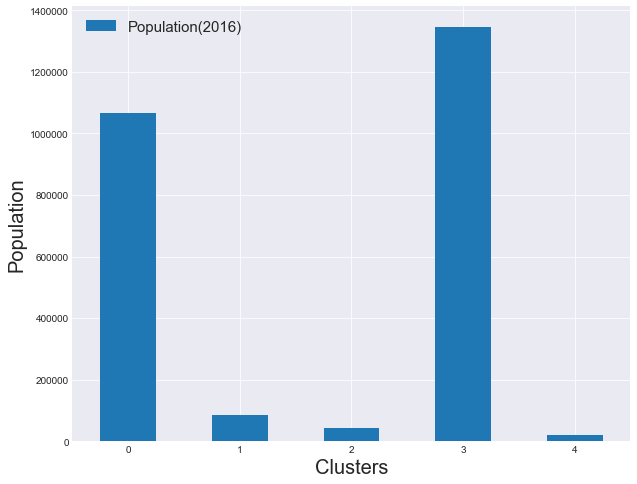

In [380]:
# potential customer group

plt.style.use('seaborn-darkgrid')
ax = cluster_sum.plot(x='Cluster Labels',y = 'Population(2016)', kind='bar', figsize =(10,8))
ax.set_xlabel('Clusters',fontsize=20)
ax.set_ylabel('Population',fontsize=20)
plt.xticks(rotation=0)
plt.legend(loc=2, prop={'size': 15})


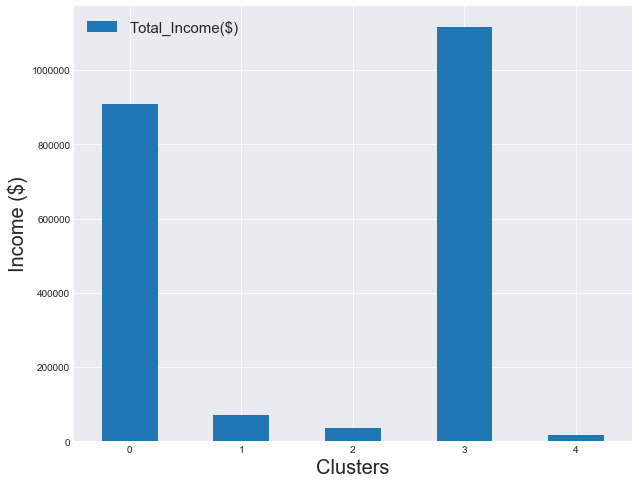

In [381]:
# Puchasing power

ax = cluster_sum.plot(x='Cluster Labels',y = 'Total_Income($)', kind='bar', figsize =(10,8))
ax.set_xlabel('Clusters',fontsize=20)
ax.set_ylabel('Income ($)',fontsize=20)
plt.xticks(rotation=0)
plt.legend(loc=2, prop={'size': 15})

Clearly, the population is has a linear increasing relationship with the income.

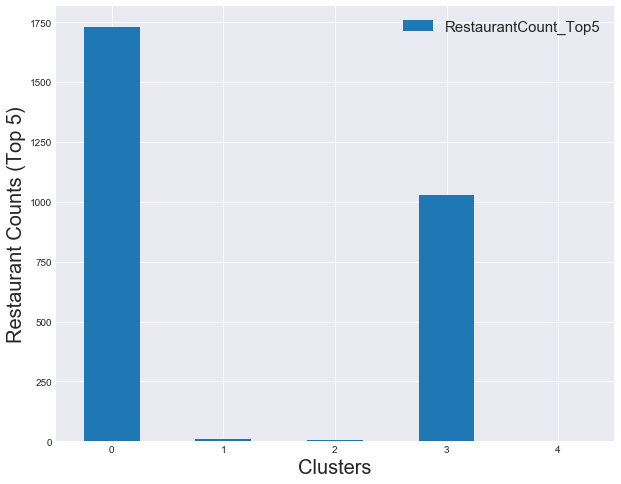

In [382]:
# Restaurant
plt.style.use('seaborn-darkgrid')
ax = cluster_sum.plot(x='Cluster Labels',y = 'RestaurantCount_Top5', kind='bar', figsize =(10,8))
ax.set_xlabel('Clusters',fontsize=20)
ax.set_ylabel('Restaurant Counts (Top 5)',fontsize=20)
plt.xticks(rotation=0)
plt.legend(loc=1, prop={'size': 15})


This result is quite interesting. The areas has higher population and annual income but less restaurants than another area. Lest's investigate the categories of the restaurants in cluster 0 and 3.

In [383]:
df_rest_count_c03 = cluster_sum[cluster_sum['Cluster Labels'].isin([0,3])]
df_rest_count_c03.drop(['Total_Income($)','Population(2016)'], axis=1, inplace=True)
df_rest_count_c03

D:\Acanconda\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Cluster Labels,RestaurantCount_Top5,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,...,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Tea Room,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,0,1730.0,3.0,3.0,23.0,0.0,20.0,26.0,8.0,65.0,...,5.0,45.0,0.0,11.0,50.0,10.0,5.0,14.0,23.0,10.0
3,3,1029.0,3.0,10.0,12.0,1.0,21.0,13.0,7.0,47.0,...,2.0,17.0,3.0,5.0,12.0,0.0,5.0,1.0,18.0,7.0


In [384]:
df_rest_count_c03 = df_rest_top5_cluster[df_rest_top5_cluster['Cluster Labels'].isin([0,3])]

sum_rest = df_rest_count_c03.T
#row = pd.DataFrame([cluster_sum['RestaurantCount'][0]], index = ["RestaurantCount"])
#sum_rest = pd.concat([row,sum_rest])
sum_rest.reset_index(inplace=True)
sum_rest.columns = ['Rests','Cluster0','Cluster3']
sum_rest.drop(0,inplace=True)
sum_rest

,Rests,Cluster0,Cluster3
1,RestaurantCount_Top5,1730.0,1029.0
2,Afghan Restaurant,3.0,3.0
3,African Restaurant,3.0,10.0
4,American Restaurant,23.0,12.0
5,Argentinian Restaurant,0.0,1.0
...,...,...,...
76,Tibetan Restaurant,10.0,0.0
77,Turkish Restaurant,5.0,5.0
78,Vegetarian / Vegan Restaurant,14.0,1.0
79,Vietnamese Restaurant,23.0,18.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

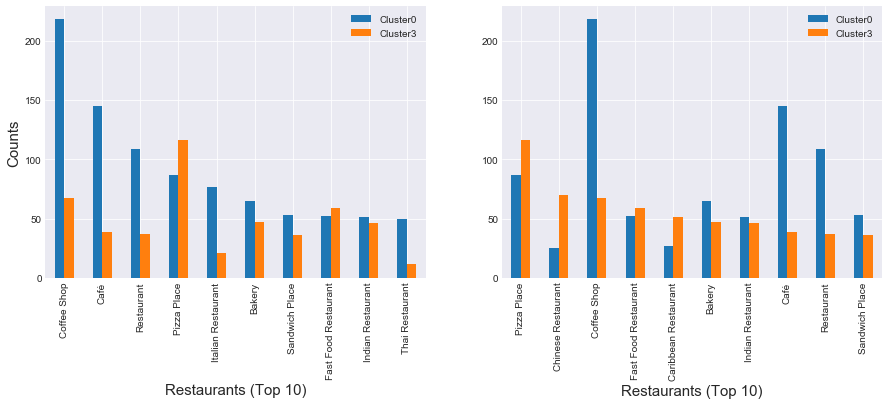

In [396]:
rest_c0_sort = sum_rest.sort_values('Cluster0', ascending=False)
rest_c3_sort = sum_rest.sort_values('Cluster3', ascending=False)

f = plt.figure(figsize=(15,5))
ax0 = f.add_subplot(121)
ax1 = f.add_subplot(122)

plt.style.use('seaborn-darkgrid')
ax = rest_c0_sort.iloc[1:11,:].plot(x='Rests', kind='bar', ax=ax0)
ax.set_xlabel('Restaurants (Top 10)',fontsize=15)
ax.set_ylabel('Counts',fontsize=15)
plt.xticks(rotation='vertical')
#plt.legend(loc=1, prop={'size': 15})

plt.style.use('seaborn-darkgrid')
ax = rest_c3_sort.iloc[1:11,:].plot(x='Rests', kind='bar', ax=ax1)
ax.set_xlabel('Restaurants (Top 10)',fontsize=15)
#ax.set_ylabel('Counts (Top 10)',fontsize=20)
plt.xticks(rotation='vertical')
#plt.legend(loc=1, prop={'size': 15})


Interesting results. We will have a look at the immigration ststus in each clusters.

In [390]:
array = ['Cluster Labels','Total_Population',
         'Local',
         'Brazil',
         'Colombia',
         'ElSalvador',
         'Guyana',
         'HaitiAM',
         'Jamaica',
         'Mexico',
         'Peru',
         'TrinidadandTobago',
         'UnitedStates',
         'BosniaandHerzegovina',
         'Croatia',
         'France',
         'Germany',
         'Greece',
         'Hungary',
         'Inuk(Inuit)',
         'Ireland',
         'Italy',
         'Netherlands',
         'Poland',
         'Portugal',
         'Romania',
         'RussianFederation',
         'Serbia',
         'Ukraine',
         'UnitedKingdom',
         'Algeria',
         'Egypt',
         'Ethiopia',
         'Kenya',
         'Morocco',
         'Nigeria',
         'Somalia',
         'SouthAfrica;Republicof',
         'Afghanistan',
         'Bangladesh',
         'China',
         'HongKong',
         'India',
         'Iran',
         'Iraq',
         'Japan',
         'Korea;South',
         'Lebanon',
         'Pakistan',
         'Philippines',
         'HaitiAS',
         'SriLanka',
         'Syria',
         'Taiwan',
         'VietNam']

df_nbhood_immig = np.zeros([len(array),2])
j=0
for i in [0,3]:
    df_nbhood_immig[:,j] = df_nbhood_total_t[df_nbhood_total_t['Cluster Labels'] == i][array].sum(axis=0)
    j+=1


df_nbhood_immig = pd.DataFrame(df_nbhood_immig.T)
df_nbhood_immig.columns = array
df_nbhood_immig = df_nbhood_immig.T
#row = pd.DataFrame([cluster_sum['RestaurantCount'][0]], index = ["RestaurantCount"])
#sum_rest = pd.concat([row,sum_rest])
df_nbhood_immig.reset_index(inplace=True)
df_nbhood_immig.columns = ['Nations','Cluster0','Cluster3']
df_nbhood_immig.drop(0,inplace=True)
df_nbhood_immig


,Nations,Cluster0,Cluster3
1,Total_Population,1045540.0,1329000.0
2,Local,605285.0,573500.0
3,Brazil,3320.0,2620.0
4,Colombia,2975.0,4535.0
5,ElSalvador,1815.0,4335.0
6,Guyana,6390.0,25615.0
7,HaitiAM,400.0,1375.0
8,Jamaica,9470.0,31205.0
9,Mexico,3335.0,2920.0
10,Peru,1510.0,1920.0


No handles with labels found to put in legend.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

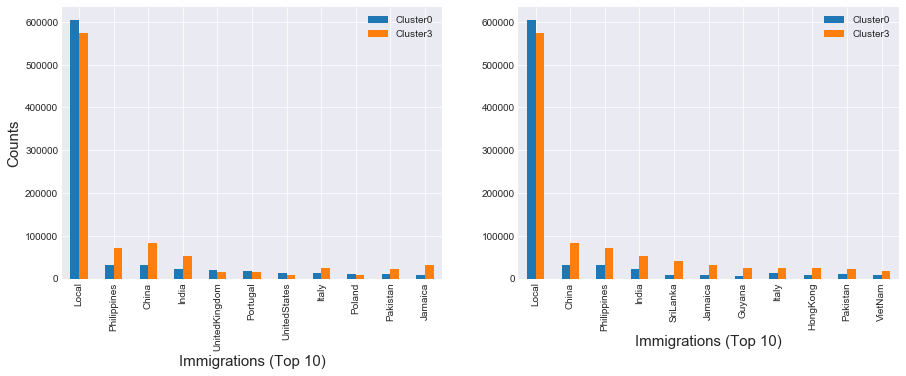

In [398]:
immig_c0_sort = df_nbhood_immig.sort_values('Cluster0', ascending=False)
immig_c3_sort = df_nbhood_immig.sort_values('Cluster3', ascending=False)

f = plt.figure(figsize=(15,5))
ax0 = f.add_subplot(121)
ax1 = f.add_subplot(122)

plt.style.use('seaborn-darkgrid')
ax = immig_c0_sort.iloc[1:12,:].plot(x='Nations', kind='bar', ax=ax0)
ax.set_xlabel('Immigrations (Top 10)',fontsize=15)
ax.set_ylabel('Counts',fontsize=15)
plt.xticks(rotation='vertical')
plt.legend(loc=1, prop={'size': 15})

plt.style.use('seaborn-darkgrid')
ax = immig_c3_sort.iloc[1:12,:].plot(x='Nations', kind='bar', ax=ax1)
ax.set_xlabel('Immigrations (Top 10)',fontsize=15)
#ax.set_ylabel('Counts (Top 10)',fontsize=20)
plt.xticks(rotation='vertical')
#plt.legend(loc=1, prop={'size': 15})


In [186]:
nbhood_c0 = list(df_nbhood_total_t[df_nbhood_total_t['Cluster Labels'] == 0]['Neighbourhood'])
print(nbhood_c0)

['Annex', 'BayStreetCorridor', 'Bendale', 'BlakeJones', 'BridlePathSunnybrookYorkMills', 'CabbagetownSouthStJamesTown', 'CasaLoma', 'ChurchYongeCorridor', 'CorsoItaliaDavenport', 'Danforth', 'DanforthEastYork', 'DovercourtWallaceEmersonJunction', 'DownsviewRodingCFB', 'DufferinGrove', 'EastEndDanforth', 'EnglemountLawrence', 'EtobicokeWestMall', 'FlemingdonPark', 'ForestHillSouth', 'GreenwoodCoxwell', 'HenryFarm', 'HighParkNorth', 'HighParkSwansea', 'IslingtonCityCentreWest', 'JunctionArea', 'KennedyPark', 'KensingtonChinatown', 'KingsviewVillageTheWestway', 'LawrenceParkNorth', 'LawrenceParkSouth', 'LittlePortugal', 'LongBranch', 'Morningside', 'MossPark', 'MountPleasantEast', 'MountPleasantWest', 'NewToronto', 'Niagara', 'NorthRiverdale', 'NorthStJamesTown', 'PalmerstonLittleItaly', 'PlayterEstatesDanforth', 'RegentPark', 'Roncesvalles', 'RunnymedeBloorWestVillage', 'SouthParkdale', 'StonegateQueensway', 'TaylorMassey', 'TheBeaches', 'TrinityBellwoods', 'University', 'WaterfrontCommu

In [187]:
nbhood_c3 = list(df_nbhood_total_t[df_nbhood_total_t['Cluster Labels'] == 3]['Neighbourhood'])
print(nbhood_c3)

['AgincourtNorth', 'AgincourtSouthMalvernWest', 'Alderwood', 'BanburyDonMills', 'BathurstManor', 'BedfordParkNortown', 'BeechboroughGreenbrook', 'BirchcliffeCliffside', 'BlackCreek', 'BriarHillBelgravia', 'BroadviewNorth', 'CentennialScarborough', 'ClairleaBirchmount', 'Cliffcrest', 'DonValleyVillage', 'DorsetPark', 'EdenbridgeHumberValley', 'EglintonEast', 'ElmsOldRexdale', 'EringateCentennialWestDeane', 'ForestHillNorth', 'GlenfieldJaneHeights', 'Guildwood', 'HillcrestVillage', 'HumberHeightsWestmount', 'Humbermede', 'Ionview', 'KeelesdaleEglintonWest', 'KingswaySouth', 'LAmoreaux', 'LeasideBennington', 'Malvern', 'MapleLeaf', 'MarklandWood', 'Milliken', 'Mimico', 'MountDennis', 'MountOliveSilverstoneJamestown', 'Oakridge', 'OakwoodVillage', 'OConnorParkview', 'OldEastYork', 'ParkwoodsDonalda', 'PleasantView', 'RexdaleKipling', 'RockcliffeSmythe', 'Rouge', 'Rustic', 'ScarboroughVillage', 'Steeles', 'TamOShanterSullivan', 'ThistletownBeaumondHeights', 'ThorncliffePark', 'VictoriaVilla

## Results and Discussion <a name="results"></a>

So according to the above figures, the neumber of potentional customers and the purchasing power in cluster 0 are higher than that in cluster 3, but the number of restaurants in cluster 3 is less than that in cluster. Then the potential optimal neighbourhoods to start a restaurant business is that in cluster 3. 

Then a very insteresting restaurant types disreibution is illustared in the above figure. In the neighbourhoods of cluster 0, more light restaurants, such as coffee and sandwitch shops, are opened. While in the nieghbourhoods in cluster 3, although the first popular restaurant is coffee shops, the ocupation rate in the immigration-type restaurants, such as Chinese, Caribbean, Indian and Italy restaurants, is quite high compared to that in cluster 0. 

By investigating the nation distributions in the neighbourhood in both cluster 0 and 3, we can conclude that the debit habbit in both clusters are locally dominated due to the majority population is Canadian. However, the second majority nation group is Philippines in Cluster 0 and there is no Phillippine restaurants in the top 10 popular restaurant list, neither to Chinese restaurant which is the third large immigration group in cluster 0. As to cluster 3, the only miss math in immigration and restaurant is the Phillippine restaurant.    

## Conclusion <a name="conclusion"></a>

According to the investigation and analysis, the optimal neighbourhood to start a restaurant business is the neighbourhoods in cluster 3, and the first choice is Phillippine restaurant. The second choice is to open a Chinese or Phillippine restaurant in the neighbourhoods in cluster 3. 